# Série 11
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices dans deux semaines.

Pour chaque exercice:

* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.

Les tentatives infructueuses, les explications, commentaires et analyses des échecs rapportent des points. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Description
Un arbre binaire peut être utilisé pour stocker une liste ordonnée d'éléments de manière à ce que la recherche et les insertions soient efficaces. Un arbre binaire utilisé de cette manière s'appelle un **arbre de tri binaire** (ou BST).

Un arbre de tri binaire est un arbre binaire ayant la propriété suivante : pour chaque nœud de l'arbre, l'élément de ce nœud est supérieur à chaque élément du sous-arbre gauche de ce nœud, et il est inférieur ou égal à tous les éléments du sous-arbre droit de ce nœud. L'exemple ci-dessous montre un arbre de tri binaire contenant des éléments de type `String`, mais il en va de même pour les entiers, ou d'autres types comparables.


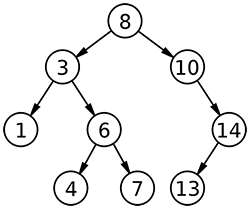

## Evaluation
Le but de l'évaluation est de montrer expérimentalement, au moyen d'une implémentation et de quelques évaluations simples, l'affirmation $H_0$ suivante :
>Si un **arbre de tri binaire** est créé **aléatoirement suivant une loi uniforme**, il y a une forte probabilité que l'arbre soit **approximativement équilibré** (*i.e.*, l'écart type de la distribution de la profondeur des feuilles est faible).

### Exercice 1
Testez la structure de données fournie en implémentant la méthode `to_sorted_list` qui retourne une liste avec les éléments ordonnés contenu dans l'arbre, du plus petit au plus grand.

In [1]:
import typing


class Comparable[T](typing.Protocol):
    def __lt__(self, other: T, /) -> bool:
        ...


# Un objet de type TreeNode représente un nœud.
class TreeNode[T]:
    def __init__ (self, item: T):
        self.item = item
        self.left: TreeNode[T] | None = None    # Objet TreeNode qui pointe vers le sous-arbre gauche.
        self.right: TreeNode[T] | None = None   # Objet TreeNode qui pointe vers le sous-arbre droit.

class Tree[T: Comparable[typing.Any]]:
    def __init__(self):
        self.root = None

    # Ajouter l'élément à l'arbre de tri binaire auquel la variable globale "root" fait référence.
    # (Notez que root ne peut pas être passée comme paramètre à cette routine
    # car la valeur de root pourrait changer, et un changement de la valeur
    # d'un paramètre formel ne change pas le paramètre réel).
    # new_item: String
    def insert(self, new_item: T):
        # L'arbre est vide.  Définissez la racine pour qu'elle pointe vers un nouveau
        # nœud contenant le nouvel élément.
        if self.root == None:
            self.root = TreeNode(new_item)
            return
        # Descend dans l'arbre pour trouver une place pour new_item.
        # Nous commençons par la racine
        runner = self.root
        while(True):
            # Puisque le nouvel élément est inférieur à l'élément runner,
            # il appartient au sous-arbre gauche du coureur.
            # S'il y a un espace libre à runner.left, ajoutez-y un nœud.
            # Sinon, avancez runner d'un niveau vers la gauche.
            if new_item < runner.item:
                if runner.left == None:
                    runner.left = TreeNode(new_item)
                    # Un nouvel élément a été ajouté à l'arbre
                    return
                else:
                    runner = runner.left
            # Puisque le nouvel élément est supérieur ou égal à l'élément runner,
            # il appartient au sous-arbre droit de runner.
            # S'il y a un espace libre à runner.right, ajoutez-y un nouveau nœud.
            # Sinon, avancez runner d'un niveau vers la droite.
            else:
                if runner.right == None:
                    runner.right = TreeNode(new_item)
                    # Un nouvel élément a été ajouté à l'arbre.
                    return
                else:
                    runner = runner.right

    # Retourne True si item est un des items de l'arbre de tri binaire vers lequel le nœud pointe.
    # Retourne False si ce n'est pas le cas.
    def contains(self, item: T):
        # Retourne True si item est un des items de l'arbre de tri binaire vers lequel le nœud pointe.
        # Retourne False si ce n'est pas le cas
        def contains_internal(node: TreeNode[T] | None, item: T) -> bool:
            # L'arbre est vide, il ne contient donc certainement pas d'élément.
            if node == None:
                return False
            # Oui, l'élément a été trouvé dans le nœud racine.
            elif item == node.item:
                return True
            # Si l'élément apparaît, il doit se trouver dans le sous-arbre de gauche
            # On renvoie le résultat de la recherche dans le sous-arbre de gauche
            elif item < node.item:
                return contains_internal(node.left, item)
            # Si l'élément apparaît, il doit se trouver dans le sous-arbre de droite
            # On renvoie le résultat de la recherche dans le sous-arbre de droite
            else:
                return contains_internal(node.right, item)

        return contains_internal(self.root, item)

    # Crée une liste ordonnée croissante des élément du BST
    def to_sorted_list(self) -> list[T]:
        def generate_node_values(node: TreeNode[T] | None) -> typing.Generator[T, None, None]:
            if node is None:
                return

            yield from generate_node_values(node.left)
            yield node.item
            yield from generate_node_values(node.right)

        return list(generate_node_values(self.root))
    

In [2]:
t = Tree[str]()
# les lettres de l'alphabet latin sont comparables en Python
t.insert("d")
t.insert("b")
t.insert("f")
t.insert("c")
t.insert("a")
t.insert("e")
t.insert("g")
sorted_list = t.to_sorted_list()
assert ["a", "b", "c", "d", "e", "f", "g"] == sorted_list
assert t.contains("a")
assert not t.contains("z")

#### Construct sorted list of tree elements

Consider any node $n$ in the tree.
The left child of $n$, $n_l$, is the root of a subtree.
This subtree is referred to as $n$'s left subtree.
Equivalently, $n$'s right child, $n_r$, is the root of some other subtree, namely $n$'s right subtree.
Binary search trees require that the left subtree of $n$ only contains values that are smaller than the value of $n$, and that the right subtree of $n$ only contains values that are at least as large as the value of $n$.

From this property, it follows that an ordered sequence of all values can be obtained by traversing in tree in-order: For any node, we know that the values in the node's left subtree must precede the node's value, and that the values of the right subtree must follow the node's value.

_Strictly speaking, some values in the node's right subtree may precede the node's value - namely the ones that are equal to the root's value.
It is always safe to traverse the tree in-order though._

This allows for a simple recursive implementation.
In every invocation, we consider exactly one node.
We start by calling the function recursively for the node's left child, as the values in the node's left subtree must be processed first.
Then, we can process the node's value itself.
And finally, we process the values in the node's right subtree.

The recursion's base case is the case in which the function is called for `None`.
This occurs when the node at the previous recursion level does not have a left child (or a right child, respectively).
An alternative implementation could already perform the `None` check of `Node#left` (or `Node#right`, respectively) in the previous recursion level and avoid the recursive call.

### Exercice 2
Créez un arbre de tri binaire aléatoire suivant $U[\![0;1000]\!]$ avec $2^{15}$ (32'768) nœuds. Vous pouvez remplir l'arbre en utilisant la méthode `insert` (voir le code source). Affichez les nombres du plus petits aux plus grands.

In [3]:
import random


def generate_random_tree(size: int, upper_bound_inclusive: int = 1000) -> Tree[int]:
    tree = Tree[int]()

    for _ in range(size):
        random_value = random.randrange(0, upper_bound_inclusive + 1, 1)
        tree.insert(random_value)

    return tree


random_tree = generate_random_tree(2**15)

In [4]:
for it in random_tree.to_sorted_list():
    print(it)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
1

We use the `random` module's `randrange` function to generate random integers.
Its signature is equivalent to the one of `range`.
That is, the first parameter designates the start value (inclusive), the second the end value (exclusive), and the third one the step.

For `step=1`, its semantics are roughly equivalent to the naive implementation `int(random.random() * end)`.
There might be a slight difference though, as "`randrange()` is more sophisticated about producing equally distributed values", as the presented naive implementation may "produce slightly uneven distributions" ([docs](https://docs.python.org/3/library/random.html#random.randrange)).

### Exercice 3
Calculez et affichez la profondeur moyenne de toutes les feuilles de l'arbre créé dans l'exercice 2.

Pour vous aider vous pourriez créer un petit fichier texte appelé `depths.txt`, avec la profondeur de chaque feuille, une valeur par ligne. Mais vous pouvez utiliser une variable pour stocker l'information. Une liste ferait l'affaire.

Pour ce faire, vous aurez besoin de deux fonctions récursives : une pour compter les feuilles et une pour trouver la somme des profondeurs de toutes les feuilles. Cette dernière routine doivent accepter un paramètre de type entier (depth), qui indique à quelle profondeur de l'arbre vous êtes allés. Lorsque vous appelez cette routine de manière récursive, la valeur de la profondeur augmente de 1. Vous êtes libre de définir des paramètres additionels, mais la récusivité est exigée pour cet exercice.

In [ ]:
def generate_leaf_depths(root: TreeNode[typing.Any], depth: int = 1) -> typing.Generator[int, None, None]:
    if root.left is None and root.right is None:
        yield depth
        return
    
    if root.left is not None:
        yield from generate_leaf_depths(root.left, depth + 1)

    if root.right is not None:
        yield from generate_leaf_depths(root.right, depth + 1)


# Fonction qui compte le nombre total de feuilles de manière récursive.
def count_leaves(root: TreeNode[typing.Any]) -> int:
    return sum(1 for _ in generate_leaf_depths(root, 1))


# Fonction qui calcule la somme des profondeurs de chaque feuille de l'arbre de manière récursive.
def sum_depth(root: TreeNode[typing.Any], depth: int = 1) -> int:
    return sum(generate_leaf_depths(root, depth))

In [ ]:
assert random_tree.root is not None


print("Number of leaves:")
counter = count_leaves(random_tree.root)
print(counter)

print("Sum of depth of all leaves")
s = sum_depth(random_tree.root, 1)
print(s)

print("Average depth:")
print(s / counter)

Number of leaves:
1001
Sum of depth of all leaves
45352
Average depth:
45.306693306693305


`generate_leaf_depths` is a recursive helper function that traverses the entire tree and _generates_ (note that the function returns a generator, a special form of an iterator) the depth of all leaves.
This is achieved as follows: As before, we consider exactly one node in every iteration.
The function is passed the depth that the current element is located at.
For the root element, we define the depth to be `1` (as suggested by code provided with the exercise; typically zero in other references).
Then we check whether the current node is a child (i.e., whether it doesn't have any children).
If that's the case, we yield the current depth and return.
This represent's the recursion's base case.
Otherwise, we know that the current node has at least one child.
We make a recursive call for every child, with the depth incremented by one (as we descend the tree by one layer).

`count_leaves` and `sum_depth` can piggy-back on this function.

- Counting the number of leaves boils down to counting the number of values generated by `generate_leaf_depths`
  - The generator expression `1 for _ in generate_leaf_depths(root, 1)` generates the value `1` for every value generated by `generate_leaf_depths` (more specifically by the generator returned by that function call).
  - The actual value generated by `generate_leaf_depths` is ignored.
- Summing up the depths is as simple as summing up the values generated by `generate_leaf_depths`

#### Exercice 3.1 (<font color='#db60cf'>Bonus</font>)
Reportez dans un graphique la distribution des profondeurs des feuilles (il y a `counter` feuilles à afficher sur un histogramme). Vous pourrez vous aider en utilisant [Matplotlib](https://matplotlib.org/), un outil de visualisation pour Python. Matplotlib est déjà inclu dans la plupart des plateforms en ligne de Jupyter Notebook (notamment Colab).

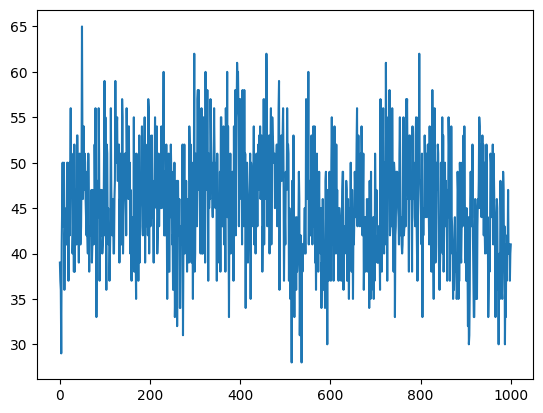

In [7]:
import matplotlib.pyplot as plt
import numpy as np

assert random_tree.root is not None

leaf_count = count_leaves(random_tree.root)
leaf_depths = list(generate_leaf_depths(random_tree.root, 1))

leaf_index = np.arange(leaf_count)

plt.plot(leaf_index, leaf_depths)

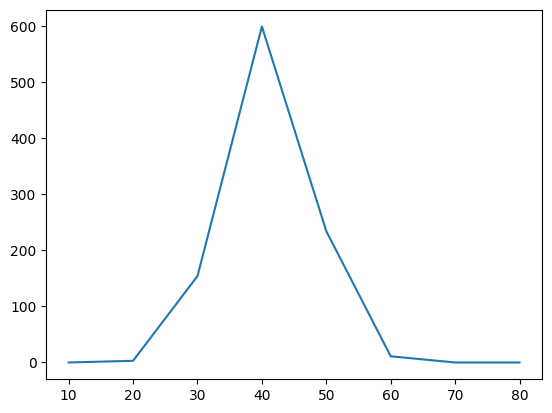

In [8]:
hist_values, hist_bin_starts = np.histogram(leaf_depths, bins=np.arange(10, 100, 10))
plt.plot(hist_bin_starts[:-1], hist_values)

Ce résultat semble-t-il dans le sens de l'hypothèse $H_0$ formulée plus tôt ? Quel serait l'intérêt qu'une telle hypothèse fût vraie ? Quelle allure aurait l'histogramme si le BST était parfaitement équilibré ?

A binary tree is balanced if the height of the left and the right subtree of any node differ by at most one.
In other words, the difference of the minimal height $h_{min}$ and the maximal height $h_{max}$ among all leaf nodes must be either zero or one.
This means that the plot graph should show either one (if $h_{max} = h_{min}$) or two (if $h_{max} = h_{min} + 1$) sharp peaks if the tree was balanced.

This does not correspond to our observation.
As this result is consistent across many executions, it is highly unlikely that the hypothesis _generally_ holds.
It may still hold for different values for the two parameters "tree size" and "domain size".

Balanced binary trees have the generally desirable property that their maximum height is bound by $log(n)$.
This immediately follows from $h_{max} - h_{min} \leq 1$.
This property is desirable in many applications as the complexity of most operations on binary search trees (including `insert` and `contains`) is bound by the tree's maximum height.
However, maintaining a structural property generally implies additional overhead.
If we had an application that deals with such uniform distributions and $H_0$ held, we could benefit from those performance characteristics without having to explicitly maintain the tree's structure in terms of balance (even though strictly speaking, the tree would probably not be balanced).

Faites varier la limite supérieure en paramètre de votre générateur uniforme d'entiers parmi `np.arange(50, 500, 10)` en prenant soin de conserver à chaque fois l'écart type et la moyenne de la distribution. Que remarquez-vous ? Comment l'expliqueriez-vous ?

In [20]:
import numpy as np
import statistics
import tqdm

leaf_depth_mean: list[float] = []
leaf_depth_std: list[float] = []
leaf_counts: list[float] = []

for upper_bound in tqdm.tqdm(np.arange(50, 500, 10)):
    tree = generate_random_tree(2 ** 15, upper_bound)
    assert tree.root is not None
    
    leaf_depths = list(generate_leaf_depths(tree.root, 1))
    leaf_count = sum(1 for _ in leaf_depths)

    leaf_depth_mean.append(statistics.mean(leaf_depths))
    leaf_depth_std.append(statistics.stdev(leaf_depths))
    leaf_counts.append(leaf_count)

100%|██████████| 45/45 [00:07<00:00,  6.02it/s]


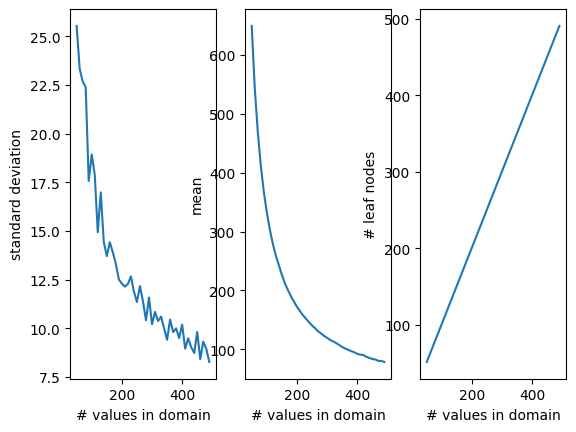

In [25]:
# plot de l'écart-type et de la moyenne en fonction du paramètre de loi uniforme lors de la création du BST
plt.subplot(1, 3, 1)
plt.xlabel("# values in domain")
plt.ylabel("standard deviation")
plt.plot(np.arange(50, 500, 10), leaf_depth_std)

plt.subplot(1, 3, 2)
plt.xlabel("# values in domain")
plt.ylabel("mean")
plt.plot(np.arange(50, 500, 10), leaf_depth_mean)


plt.subplot(1, 3, 3)
plt.xlabel("# values in domain")
plt.ylabel("# leaf nodes")
plt.plot(np.arange(50, 500, 10), leaf_counts)

We observe that trees that only store values over a small domain have a significantly larger average leaf height than trees that store values over a larger domain.
Moreover, the domain size seems to be negatively correlated with the variance of leaf heights.
In terms of balance, it therefore seems that trees storing values over small domains are significantly more deteriorated.

Also note that the number of leaf nodes increases as the size of the domain increases.
It seems as if the number of leaf nodes corresponds exactly to the number of values in the domain.

All these observations can be explained by the fact that the tree stores many more values than there are values in the domain.
In other words, the tree stores large amount of duplicate values:

- Recall that a binary search tree requires that the values in a node's left subtree are strictly smaller than the node's value.
  This means that if a node $n$ with value $v$ has another node $n'$ with value $v$ as its direct child, $n'$ can only be $n$'s right child.
- Consider the more general case in which $n$ is an ancestor of $n'$ but not necessarily its parent. 
  In this case, we observe that $n'$ can only have a single child, specifically a right child: $n$'s right subtree only contains values larger than $v$, so $n'$ cannot possibly have a child smaller than $v$.

Since our randomly generated tree contains many duplicate values, many nodes have only a single child, which significantly increases the overall height of the tree.
This effect diminishes as we increase the size of the domain.

We also make the following observation:

- There can be only a single leaf per value: Suppose that the tree stores the value $v$ only once and that the value is stored in a leaf. When we insert $v$ again, the newly inserted value will necessarily be stored as a child of $v$. The original leaf node therefore becomes an internal node. An internal node cannot become a leaf node again, as we don't consider deletions here.

This explains the strong correlation between the number of leaf nodes and the number of distinct values.
Note, however, that the number of leaf nodes does not necessarily equal the number of distinct values in the domain, as it is possible for all nodes with a specific value to be internal nodes.
The number of distinct values in the domain therefore only represents an upper bound.